In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Masking, GRU, Dense
from tensorflow.keras.utils import to_categorical

In [5]:
df = pd.read_csv('/content/drive/MyDrive/Preprocessed Time Series Final.csv')
print(df.head())

   event_type  product_id   category_id     price    user_id  \
0           1     1002532  2.053010e+18  0.937399  551377651   
1           2    26204062  2.053010e+18 -0.188667  515547943   
2           1     4804055  2.053010e+18 -0.342339  524601178   
3           2     1307240  2.053010e+18  0.211381  520575653   
4           0     1002524  2.053010e+18  0.578390  524325294   

                           user_session  category_code_0  category_code_1  \
0  3c80f0d6-e9ec-4181-8c5c-837a30be2d68                0                0   
1  4737b7aa-83f7-4899-86e0-2d53b2ddbffc                0                0   
2  2af9b570-0942-4dcd-8f25-4d84fba82553                0                0   
3  9acd3cb7-79b7-4293-bb81-bec02a1c9cd3                0                0   
4  0b74a829-f9d7-4654-b5b0-35bc9822c238                0                0   

   category_code_2  category_code_3  ...  brand_2  brand_3  brand_4  brand_5  \
0                0                0  ...        0        0        0     

In [6]:
features = ['price'] + [f'category_code_{i}' for i in range(5)] + [f'brand_{i}' for i in range(12)]

In [7]:
 #Step 2: Prepare X and y
X = df[features].values  # shape (num_samples, num_features)
y = df['event_type'].values  # labels (strings)


In [8]:
from sklearn.preprocessing import LabelEncoder

# Step 3: Encode labels as integers
le = LabelEncoder()
y_encoded = le.fit_transform(y)  # e.g. 'view' -> 0, 'cart' -> 1, 'purchase' -> 2

num_classes = len(le.classes_)

In [9]:
 #Step 4: Convert y to one-hot vectors
y_onehot = to_categorical(y_encoded, num_classes=num_classes)

In [10]:
# Step 5: Split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y_onehot, test_size=0.2, random_state=42, stratify=y_encoded)


In [11]:
# Step 6: Reshape for GRU input: (samples, timesteps, features)
seq_length = 1
num_features = len(features)
X_train = X_train.reshape((X_train.shape[0], seq_length, num_features))
X_test = X_test.reshape((X_test.shape[0], seq_length, num_features))

In [12]:
# Step 7: Build model with GRU
model = Sequential()
model.add(Masking(mask_value=0., input_shape=(seq_length, num_features)))
model.add(GRU(64, return_sequences=False))
model.add(Dense(32, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/masking.py:47: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [13]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [14]:
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

Epoch 1/10
20000/20000 ━━━━━━━━━━━━━━━━━━━━ 88s 4ms/step - accuracy: 0.4483 - loss: 1.0377 - val_accuracy: 0.4632 - val_loss: 1.0167
Epoch 2/10
20000/20000 ━━━━━━━━━━━━━━━━━━━━ 139s 4ms/step - accuracy: 0.4667 - loss: 1.0153 - val_accuracy: 0.4691 - val_loss: 1.0089
Epoch 3/10
20000/20000 ━━━━━━━━━━━━━━━━━━━━ 81s 4ms/step - accuracy: 0.4701 - loss: 1.0090 - val_accuracy: 0.4704 - val_loss: 1.0081
Epoch 4/10
20000/20000 ━━━━━━━━━━━━━━━━━━━━ 85s 4ms/step - accuracy: 0.4714 - loss: 1.0053 - val_accuracy: 0.4730 - val_loss: 1.0034
Epoch 5/10
20000/20000 ━━━━━━━━━━━━━━━━━━━━ 81s 4ms/step - accuracy: 0.4721 - loss: 1.0025 - val_accuracy: 0.4739 - val_loss: 1.0027
Epoch 6/10
20000/20000 ━━━━━━━━━━━━━━━━━━━━ 82s 4ms/step - accuracy: 0.4736 - loss: 1.0017 - val_accuracy: 0.4734 - val_loss: 1.0016
Epoch 7/10
20000/20000 ━━━━━━━━━━━━━━━━━━━━ 82s 4ms/step - accuracy: 0.4752 - loss: 0.9993 - val_accuracy: 0.4738 - val_loss: 0.9999
Epoch 8/10
20000/20000 ━━━━━━━━━━━━━━━━━━━━ 83s 4ms/step - accuracy:

In [15]:

# Step 8: Train
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

Epoch 1/10
20000/20000 ━━━━━━━━━━━━━━━━━━━━ 85s 4ms/step - accuracy: 0.4757 - loss: 0.9965 - val_accuracy: 0.4773 - val_loss: 0.9970
Epoch 2/10
20000/20000 ━━━━━━━━━━━━━━━━━━━━ 82s 4ms/step - accuracy: 0.4753 - loss: 0.9959 - val_accuracy: 0.4768 - val_loss: 0.9968
Epoch 3/10
20000/20000 ━━━━━━━━━━━━━━━━━━━━ 139s 4ms/step - accuracy: 0.4767 - loss: 0.9948 - val_accuracy: 0.4770 - val_loss: 0.9976
Epoch 4/10
20000/20000 ━━━━━━━━━━━━━━━━━━━━ 79s 4ms/step - accuracy: 0.4765 - loss: 0.9950 - val_accuracy: 0.4762 - val_loss: 0.9958
Epoch 5/10
20000/20000 ━━━━━━━━━━━━━━━━━━━━ 80s 4ms/step - accuracy: 0.4766 - loss: 0.9939 - val_accuracy: 0.4769 - val_loss: 0.9966
Epoch 6/10
20000/20000 ━━━━━━━━━━━━━━━━━━━━ 82s 4ms/step - accuracy: 0.4786 - loss: 0.9934 - val_accuracy: 0.4783 - val_loss: 0.9957
Epoch 7/10
20000/20000 ━━━━━━━━━━━━━━━━━━━━ 81s 4ms/step - accuracy: 0.4786 - loss: 0.9927 - val_accuracy: 0.4768 - val_loss: 0.9950
Epoch 8/10
20000/20000 ━━━━━━━━━━━━━━━━━━━━ 83s 4ms/step - accuracy:

In [16]:
# Step 9: Evaluate
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Accuracy: {accuracy:.4f}')

6250/6250 ━━━━━━━━━━━━━━━━━━━━ 13s 2ms/step - accuracy: 0.4754 - loss: 0.9941
Test Accuracy: 0.4762


6250/6250 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step


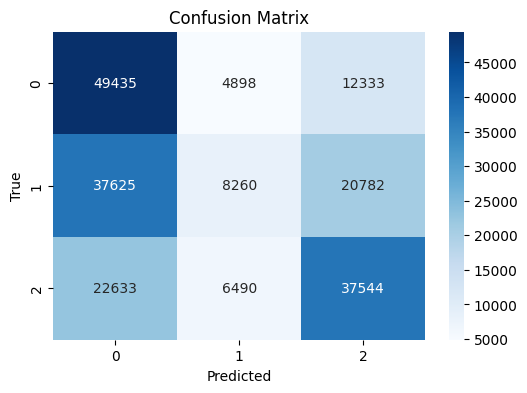

In [17]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

import matplotlib.pyplot as plt

# Get predicted classes for test set
y_pred_probs = model.predict(X_test)
y_pred = y_pred_probs.argmax(axis=1)
y_true = y_test.argmax(axis=1)

# Compute confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Plot confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=le.classes_, yticklabels=le.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [18]:
#save the model
from tensorflow.keras.models import load_model
model.save('GRU_model.h5')

In [19]:
#load the model
loaded_model = load_model('GRU_model.h5')